In [1]:
# coding: utf-8
import tensorflow as tf
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

/Users/sunchao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/sunchao/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
boston = load_boston()
# X = scale(boston.data)
# y = scale(boston.target.reshape((-1,1)))


X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size=0.1,random_state=0)
X_train = scale(X_train)
X_test = scale(X_test)
y_train = scale(y_train.reshape((-1,1)))
y_test = scale(y_test.reshape((-1,1)))

In [29]:
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size=0.1,random_state=0)

In [3]:
boston.data.shape

(506, 13)

In [4]:
print("自变量---源数据:",boston.data.shape, "；  训练集:",X_train.shape, "；  测试集:",X_test.shape)
print("因变量---源数据:",boston.target.shape, "；  训练集:",y_train.shape, "；  测试集:",y_test.shape)


自变量---源数据: (506, 13) ；  训练集: (455, 13) ；  测试集: (51, 13)
因变量---源数据: (506,) ；  训练集: (455, 1) ；  测试集: (51, 1)


In [5]:
# 网络添加函数
def add_layer(inputs, input_size, output_size, activation_function=None):
    with tf.variable_scope("Weights"):
        Weights = tf.Variable(tf.random_normal(shape=[input_size,output_size]), name="weights")
    with tf.variable_scope("biases"):
        biases = tf.Variable(tf.zeros(shape=[1, output_size]) + 0.1, name="biases")
    with tf.name_scope("Wx_plus_b"):
        Wx_plus_b = tf.matmul(inputs, Weights) + biases
    with tf.name_scope("dropout"):
        Wx_plus_b = tf.nn.dropout(Wx_plus_b, keep_prob=keep_prob_s)
    if activation_function is None:
        return Wx_plus_b
    else:
        return activation_function(Wx_plus_b)

In [6]:
X_train.shape[1]

13

In [7]:
# 定义占位符和网络层数
xs = tf.placeholder(shape = [None, X_train.shape[1]], dtype=tf.float32, name="inputs")
ys = tf.placeholder(shape = [None, 1], dtype=tf.float32, name="y_true")
keep_prob_s = tf.placeholder(dtype=tf.float32)

with tf.name_scope("layer_1"):
    l1 = add_layer(xs, 13, 10, activation_function=tf.nn.relu)

with tf.name_scope("y_pred"):
    pred = add_layer(l1, 10, 1)

# 保存pred的操作结果，做恢复使用
pred = tf.add(pred, 0, name="pred")

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - pred), reduction_indices=[1]))   # MSE误差
    tf.summary.scalar("loss", loss)
    
with tf.name_scope("train"):
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

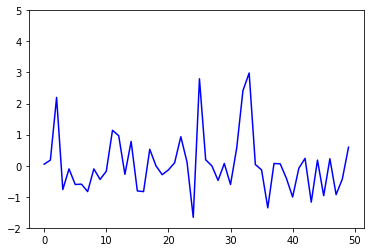

In [8]:
# draw pics
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(50),y_train[0:50],'b')  #展示前50个数据
ax.set_ylim([-2,5])
plt.ion()
plt.show()

# parameters
keep_prob=1  # 防止过拟合，取值一般在0.5到0.8。我这里是1，没有做过拟合处理
ITER =5000  # 训练次数


In [9]:
def fit(X,y,ax,n, keep_prob):
    init = tf.global_variables_initializer()
    feed_dict = {xs:X, ys:y, keep_prob_s:keep_prob}
    with tf.Session() as sess:

        saver = tf.train.Saver(tf.global_variables(), max_to_keep=15)
        merged = tf.summary.merge_all()
        writer = tf.summary.FileWriter(logdir="nn_boston_log", graph=sess.graph)  #写tensorbord
        sess.run(init)
        for i in range(n):
            _loss, _ = sess.run([loss,train_op], feed_dict=feed_dict)
            
            if i % 100 == 0:
                print("epoch:%d\tloss:%.5f" % (i, _loss))
                y_pred = sess.run(pred, feed_dict = feed_dict)
                rs = sess.run(merged, feed_dict=feed_dict)
                writer.add_summary(summary=rs, global_step=i)  #写tensorbord
                saver.save(sess=sess, save_path="nn_boston_model/nn_boston.model", global_step=i) # 保存模型
                try:
                    ax.lines.remove(lines[0])
                except:
                    pass
                lines = ax.plot(range(50), y_pred[0:50], 'r--')
                plt.pause(1)
                plt.ion()
                plt.show()
        saver.save(sess=sess, save_path="nn_boston_model/nn_boston.model", global_step=n)  # 保存模型 

In [10]:
fit(X=X_train,y=y_train,n=ITER,keep_prob=keep_prob,ax=ax)

epoch:0	loss:19.53718
epoch:100	loss:0.39409
epoch:200	loss:0.30999
epoch:300	loss:0.27648
epoch:400	loss:0.25516
epoch:500	loss:0.24119
epoch:600	loss:0.23102
epoch:700	loss:0.22282
epoch:800	loss:0.21603
epoch:900	loss:0.21033
epoch:1000	loss:0.20517
epoch:1100	loss:0.20056
epoch:1200	loss:0.19621
epoch:1300	loss:0.19221
epoch:1400	loss:0.18847
epoch:1500	loss:0.18508
epoch:1600	loss:0.18193
epoch:1700	loss:0.17902
epoch:1800	loss:0.17640
epoch:1900	loss:0.17399
epoch:2000	loss:0.17176
epoch:2100	loss:0.16971
epoch:2200	loss:0.16783
epoch:2300	loss:0.16609
epoch:2400	loss:0.16446
epoch:2500	loss:0.16292
epoch:2600	loss:0.16154
epoch:2700	loss:0.16029
epoch:2800	loss:0.15912
epoch:2900	loss:0.15801
epoch:3000	loss:0.15697
epoch:3100	loss:0.15601
epoch:3200	loss:0.15508
epoch:3300	loss:0.15423
epoch:3400	loss:0.15339
epoch:3500	loss:0.15258
epoch:3600	loss:0.15170
epoch:3700	loss:0.15094
epoch:3800	loss:0.15024
epoch:3900	loss:0.14959
epoch:4000	loss:0.14898
epoch:4100	loss:0.14839
epo

## use model to predict data

INFO:tensorflow:Restoring parameters from nn_boston_model/nn_boston.model-5000


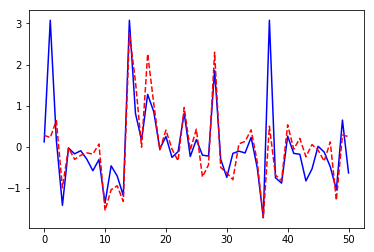

In [17]:
X = boston.data
y = boston.target
# split train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

# scale data
X_test = scale(X_test)
y_test = scale(y_test).reshape((-1,1))

def predict(X,y,keep_prob):

    with tf.Session() as sess:

        # restore saver
        saver = tf.train.import_meta_graph(meta_graph_or_file="nn_boston_model/nn_boston.model-5000.meta")
        model_file = tf.train.latest_checkpoint(checkpoint_dir="nn_boston_model")
        saver.restore(sess=sess,save_path=model_file)

        # init graph
        graph = tf.get_default_graph()

        # get placeholder from graph
#         xs = graph.get_tensor_by_name("inputs:0")
#         ys = graph.get_tensor_by_name("y_true:0")
#         keep_prob_s = graph.get_tensor_by_name("keep_prob:0")

        # get operation from graph
        pred = graph.get_tensor_by_name("pred:0")

        # run pred
        feed_dict = {xs: X, ys: y, keep_prob_s: keep_prob}
        y_pred = sess.run(pred,feed_dict=feed_dict)

    return y_pred.reshape(-1)
y_pred = predict(X=X_test,y=y_test,keep_prob=1)
# show data
plt.plot(range(len(y_test)),y_test,'b')
plt.plot(range(len(y_pred)),y_pred,'r--')
plt.show()

In [18]:
X_train.shape

(455, 13)

In [19]:
y_train.shape

(455,)

In [22]:
type(y_train)

numpy.ndarray

In [23]:
X_train

array([[1.7899e-01, 0.0000e+00, 9.6900e+00, ..., 1.9200e+01, 3.9329e+02,
        1.7600e+01],
       [5.3700e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.7835e+02,
        1.1650e+01],
       [3.6894e-01, 2.2000e+01, 5.8600e+00, ..., 1.9100e+01, 3.9690e+02,
        3.5400e+00],
       ...,
       [1.5098e-01, 0.0000e+00, 1.0010e+01, ..., 1.7800e+01, 3.9451e+02,
        1.0300e+01],
       [2.2927e-01, 0.0000e+00, 6.9100e+00, ..., 1.7900e+01, 3.9274e+02,
        1.8800e+01],
       [1.3914e-01, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9690e+02,
        1.4690e+01]])

In [26]:
y_train.shape

(455,)

In [27]:
y_train

array([23.1, 24.3, 42.8, 15.6, 21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. ,
       33.1, 31.5, 20.1, 29.8, 15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5,
       31.2, 23.7,  7.4, 48.3, 24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8,
       50. , 23. , 21.4, 10.2, 23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9,
       24.3, 13.8, 24.7, 14.1, 18.7, 28.1, 19.8, 26.7, 21.7, 22. , 22.9,
       10.4, 21.9, 20.6, 26.4, 41.3, 17.2, 27.1, 20.4, 16.5, 24.4,  8.4,
       23. ,  9.7, 50. , 30.5, 12.3, 19.4, 21.2, 20.3, 18.8, 33.4, 18.5,
       19.6, 33.2, 13.1,  7.5, 13.6, 17.4,  8.4, 35.4, 24. , 13.4, 26.2,
        7.2, 13.1, 24.5, 37.2, 25. , 24.1, 16.6, 32.9, 36.2, 11. ,  7.2,
       22.8, 28.7, 14.4, 24.4, 18.1, 22.5, 20.5, 15.2, 17.4, 13.6,  8.7,
       18.2, 35.4, 31.7, 33. , 22.2, 20.4, 23.9, 25. , 12.7, 29.1, 12. ,
       17.7, 27. , 20.6, 10.2, 17.5, 19.7, 29.8, 20.5, 14.9, 10.9, 19.5,
       22.7, 19.5, 24.6, 25. , 24.5, 50. , 14.3, 11.8, 31. , 28.7, 16.2,
       43.5, 25. , 22. , 19.9, 22.1, 46. , 22.9, 20